### 数据处理

利用Dataset类加载数据， 自定义的数据集需要继承Dataset，并实现__getitem__ 和 __len__ 方法。

torchvision.transforms 模块实现了对PIL Image对象和Tensor对象的常用操作。

In [4]:
import os
from  PIL import Image
import numpy as np
from torch.utils import data
from torchvision import transforms as T

In [5]:
transform = T.Compose([
    T.Resize(224), T.CenterCrop(224),
    T.ToTensor(), T.Normalize(mean = [.5, .5, .5], std = [.5, .5, .5])
])

class DogCat(data.Dataset):
    def __init__(self, root, transforms=None):
        imgs = os.listdir(root)
        self.imgs = [os.path.join(root, img) for img in imgs]
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = 0 if 'dog' in img_path.split('/')[-1] else 1
        data = Image.open(img_path)
        if self.transforms:
            data = self.transforms(data)
        return data, label
    
    def __len__(self):
        return len(self.imgs)
    
    

### 视觉工具包 torchvision

包含三个部分：

models: 提供各种经典网络结构和模型

datasets： 提供常用的数据集加载

transforms： 提供常用的数据预处理操作


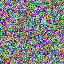

In [7]:
from torchvision import transforms
import torch as t
to_pil = transforms.ToPILImage()
to_pil(t.randn(3, 64, 64))       #随机噪声

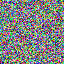

In [13]:
from torchvision.utils import make_grid, save_image

img1 = (t.randn(3,64,64))
img2 = (t.randn(3,64,64))
img = make_grid(img1, img2)     # make_grid 可将多张图片拼接在一起
to_pil(img)

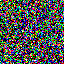

In [15]:
save_image(img, 'a.png')    #将Tensor保存成图片
Image.open('a.png')         #读取图片

In [16]:
pwd

'/home/zilong/Desktop/test/pytorch'

可视化工具： tensorboard_logger, visdom 

In [28]:
%%sh
nohup python -m visdom.server

Process is interrupted.


In [25]:
import visdom

vis = visdom.Visdom(env=u'test1')

x = t.arange(1, 30, 0.01)
y = t.sin(x)
vis.line(X=x, Y=y, win='sinx', opts={'title': 'y=sin(x)'})

'sinx'

Connection is already closed.


In [26]:
for ii in range(0, 10):
    x = t.Tensor([ii])
    y = x
    vis.line(X = x, Y = y, win='polynomial', update='append' if ii>0 else None)
    
x = t.arange(0, 9, 0.1)
y = (x**2)/9
vis.updateTrace(X=x, Y=y, win='polynomial', name='this is a new trace')

Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------
Exception in user code:
------------------------------------------------------------


Traceback (most recent call last):
  File "/home/zilong/anaconda3/lib/python3.6/site-packages/urllib3/connection.py", line 141, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "/home/zilong/anaconda3/lib/python3.6/site-packages/urllib3/util/connection.py", line 83, in create_connection
    raise err
  File "/home/zilong/anaconda3/lib/python3.6/site-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zilong/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 601, in urlopen
    chunked=chunked)
  File "/home/zilong/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 357, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/home/zilong/anaconda3/lib/python3.6/http/client.py", line 1239, in req

AttributeError: 'Visdom' object has no attribute 'updateTrace'

In [31]:
vis.image(t.randn(64, 64).numpy())

保存Module和Optimizer对象时，应保存对应的state_dict

In [32]:
from torchvision.models import AlexNet

model = AlexNet()
model.state_dict().keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.3.weight', 'features.3.bias', 'features.6.weight', 'features.6.bias', 'features.8.weight', 'features.8.bias', 'features.10.weight', 'features.10.bias', 'classifier.1.weight', 'classifier.1.bias', 'classifier.4.weight', 'classifier.4.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [35]:
t.save(model.state_dict(), 'alexnet.pth')
model.load_state_dict(t.load('alexnet.pth'))
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [36]:
optimizer = t.optim.Adam(model.parameters(), lr=0.1)
t.save(optimizer.state_dict(), 'optimizer.pth')
optimizer.load_state_dict(t.load('optimizer.pth'))
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.1
    weight_decay: 0
)

In [37]:
# 同时保存模型和优化器
all_data = dict(optimizer = optimizer.state_dict(),
               model = model.state_dict(),
               info = u'optimizer and module')
t.save(all_data, 'all.pth')

all_data = t.load('all.pth')
all_data.keys()

dict_keys(['optimizer', 'model', 'info'])